In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.utils import shuffle

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing

from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('./data/data_processed.csv', index_col=0)

In [3]:
df.columns

Index(['Food_name', 'Water (g)', 'Energy (kal)', 'Protein (g)', 'lipid (g)',
       'Carbohydrate (g)', 'Fiber (g)', 'Ash (g)', 'Ca (mg)', 'Fe (mg)',
       'Mg (mg)', 'P (mg)', 'K (mg)', 'Na (mg)', 'Zn (mg)', 'Se (µg)',
       'Cu (mg)', 'Mn (mg)', 'Vc (mg)', 'Thiamin (mg)', 'Riboflavin (mg)',
       'Niacin (mg)', 'B6 (mg)', 'Folate,DFE (µg)', 'B12 (µg)', 'Va,RAE (µg)',
       'Ve (mg)', 'saturated (g)', 'monounsaturated (g)',
       'polyunsaturated (g)', 'trans (g)', 'Cholesterol (mg)', 'Caffeine (mg)',
       'phenolics (mg)', 'pH', 'Plain Occurences', 'Cool Occurences',
       'Warm Occurences', 'Cold Occurences', 'Heavy Cold Occurences',
       'Heavy Warm Occurences', 'Hot Occurences', 'Heavy Hot Occurences',
       '% Plain', '% Cool', '% Warm', '% Cold', '% Heavy Cold', '% Heavy Warm',
       '% Hot', '% Heavy Hot', 'hot_cold_scale', 'Plain', 'Cold', 'Hot',
       'Mode', 'Mode_code'],
      dtype='object')

In [4]:
df = df.drop(["Plain Occurences", "Cool Occurences", "Warm Occurences", "Cold Occurences", "Heavy Cold Occurences", "Heavy Warm Occurences","Hot Occurences", "Heavy Hot Occurences", '% Plain', '% Cool', '% Warm', '% Cold', '% Heavy Cold', '% Heavy Warm','% Hot', '% Heavy Hot', 'Plain', 'Cold', 'Hot', 'hot_cold_scale'], axis = 1)

In [5]:
df.columns

Index(['Food_name', 'Water (g)', 'Energy (kal)', 'Protein (g)', 'lipid (g)',
       'Carbohydrate (g)', 'Fiber (g)', 'Ash (g)', 'Ca (mg)', 'Fe (mg)',
       'Mg (mg)', 'P (mg)', 'K (mg)', 'Na (mg)', 'Zn (mg)', 'Se (µg)',
       'Cu (mg)', 'Mn (mg)', 'Vc (mg)', 'Thiamin (mg)', 'Riboflavin (mg)',
       'Niacin (mg)', 'B6 (mg)', 'Folate,DFE (µg)', 'B12 (µg)', 'Va,RAE (µg)',
       'Ve (mg)', 'saturated (g)', 'monounsaturated (g)',
       'polyunsaturated (g)', 'trans (g)', 'Cholesterol (mg)', 'Caffeine (mg)',
       'phenolics (mg)', 'pH', 'Mode', 'Mode_code'],
      dtype='object')

In [6]:
# Reduce the number of features (poor ML as little entries and too many features). The method is based on the previous statistical analysis. Only select the most significant

def reducedCol(df):
    df = df[['Food_name', 'B6 (mg)', 'Folate,DFE (µg)', 'Water (g)', 'B12 (µg)', 'Mn (mg)', 'Energy (kal)', 'Carbohydrate (g)', 'Protein (g)','Ve (mg)', 'P (mg)', 'K (mg)', 'Niacin (mg)', 'Vc (mg)', 'Fiber (g)', 'Mode', 'Mode_code']]
    return df

# df = reducedCol(df)
    

In [7]:
df.columns

Index(['Food_name', 'Water (g)', 'Energy (kal)', 'Protein (g)', 'lipid (g)',
       'Carbohydrate (g)', 'Fiber (g)', 'Ash (g)', 'Ca (mg)', 'Fe (mg)',
       'Mg (mg)', 'P (mg)', 'K (mg)', 'Na (mg)', 'Zn (mg)', 'Se (µg)',
       'Cu (mg)', 'Mn (mg)', 'Vc (mg)', 'Thiamin (mg)', 'Riboflavin (mg)',
       'Niacin (mg)', 'B6 (mg)', 'Folate,DFE (µg)', 'B12 (µg)', 'Va,RAE (µg)',
       'Ve (mg)', 'saturated (g)', 'monounsaturated (g)',
       'polyunsaturated (g)', 'trans (g)', 'Cholesterol (mg)', 'Caffeine (mg)',
       'phenolics (mg)', 'pH', 'Mode', 'Mode_code'],
      dtype='object')

### Logistic Regression

In [8]:
def logistic_regression(df):
    """
    Apply sample logistic regression model to dataframe

    df : (dataframe)
    x : (compounds column as int)
    y : (classification column as int)
    """
    # values of each column
    x = df.iloc[:, 1:-1].drop(columns="Mode")
    y = df["Mode_code"].astype('int')
    # split data into training and test set
    # 75 training, 25 testing
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

    # standardize and scale data
    scaler = MinMaxScaler()
    xtrain = scaler.fit_transform(xtrain)
    xtest = scaler.fit_transform(xtest)

    # modeling + analysis
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
    model.fit(xtrain, ytrain.ravel())
    y_pred = model.predict(xtest)

    # confusion matrix of test size
    conf_m = confusion_matrix(ytest, y_pred)
    print("Confusion Matrix : ", conf_m)
    
    plot_confusion_matrix(model, xtest, ytest)

    # accuracy score of test size
    print ("Accuracy : ", accuracy_score(ytest, y_pred))

/Users/aaronxie/.local/share/virtualenvs/analysis-gniU7RWb/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aaronxie/.local/share/virtualenvs/analysis-gniU7RWb/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix :  [[ 4  3 16]
 [ 6  7  5]
 [ 1  1  6]]
Accuracy :  0.3469387755102041


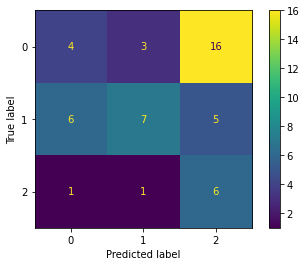

In [9]:
logistic_regression(df)

### KNN

In [10]:
def knn(df):
    x = df.iloc[:, 1:-1].drop(columns="Mode")
    y = df["Mode_code"].astype('int')
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    print ("Accuracy : ", accuracy_score(y_test, y_pred))

In [11]:
knn(df)

Accuracy :  0.3673469387755102


more processing for following

### Random Forest

In [12]:
def random_forest(df):
    X = df.iloc[:, 1:-1].drop(columns="Mode")
    Y = df["Mode_code"].astype('int')

    factor = pd.factorize(df['Mode'])
    df.Mode = factor[0]
    definitions = factor[1]
    print(definitions)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    reversefactor = dict(zip(range(3),definitions))
    y_test = np.vectorize(reversefactor.get)(y_test)
    y_pred = np.vectorize(reversefactor.get)(y_pred)
    print(pd.crosstab(y_test, y_pred, rownames=['Actual Temp'], colnames=['Predicted Temp']))
    print(accuracy_score(y_test, y_pred))

In [13]:
random_forest(df)

Index(['Plain', 'Cold', 'Hot'], dtype='object')
Predicted Temp  Cold  Hot  Plain
Actual Temp                     
Cold              12    3      6
Hot                7    4      4
Plain              9    2     14
0.4918032786885246


### SVM

In [14]:
def svm(df):
    X = df.iloc[:, 1:-1].drop(columns="Mode")
    y = df["Mode_code"].astype('int')
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)
    rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
    poly = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
    poly_pred = poly.predict(X_test)
    rbf_pred = rbf.predict(X_test)
    poly_accuracy = accuracy_score(y_test, poly_pred)
    poly_f1 = f1_score(y_test, poly_pred, average='weighted')
    print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
    print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
    rbf_accuracy = accuracy_score(y_test, rbf_pred)
    rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
    print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
    print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

In [15]:
svm(df)

Accuracy (Polynomial Kernel):  24.49
F1 (Polynomial Kernel):  10.61
Accuracy (RBF Kernel):  26.53
F1 (RBF Kernel):  11.13
